# Proyek Analisis Data: Apple Quality Analysis


*   **Nama:** Riza Nursyah
*   **Instansi:** Universitas Muhammadiyah Sukabumi
*   **Jurusan:** Teknik Informatika

## Menentukan Pertanyaan Bisnis

*   Bagaimana hubungan antara ukuran (Size) dan berat (Weight) buah apel?
*   Apakah terdapat korelasi antara tingkat kemanisan (Sweetness) dan tingkat kekrenyahan (Crunchiness) buah apel terhadap kualitas buah secara keseluruhan?
*   Bagaimana distribusi tingkat kesegaran (Juiciness) buah apel terhadap tingkat kematangan (Ripeness) dan tingkat keasaman (Acidity)?
*   Apakah ada pola yang dapat dilihat dalam atribut-atribut yang menyebabkan buah apel dikategorikan sebagai "good" atau "bad" dalam hal kualitasnya secara keseluruhan?



## Import Package/Library yang akan Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
apple_df = pd.read_csv('https://raw.githubusercontent.com/rizanss/Apple-Quality-Analysis/main/apple_quality.csv')
apple_df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### Assessing Data

In [ ]:
# Menilai Data dari apple_df
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
# Memeriksa missing values pada apple_df
apple_df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
# Memeriksa duplikasi pada apple_df
print('Jumlah Duplikasi: ', apple_df.duplicated().sum())

Jumlah Duplikasi:  0


In [ ]:
# Memeriksa parameter statistik pada apple_df
apple_df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


### Cleaning Data

In [ ]:

apple_df = apple_df.drop(apple_df.index[4000], axis=0)
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
apple_df['A_id'] = apple_df['A_id'].astype(int)
apple_df['Acidity'] = apple_df['Acidity'].astype(float)
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


## Exploratory Data Analysis (EDA)

### Bagaimana hubungan antara ukuran (Size) dan berat (Weight) buah apel?

Korelasi antara Size dan Weight:  -0.17070165787391348


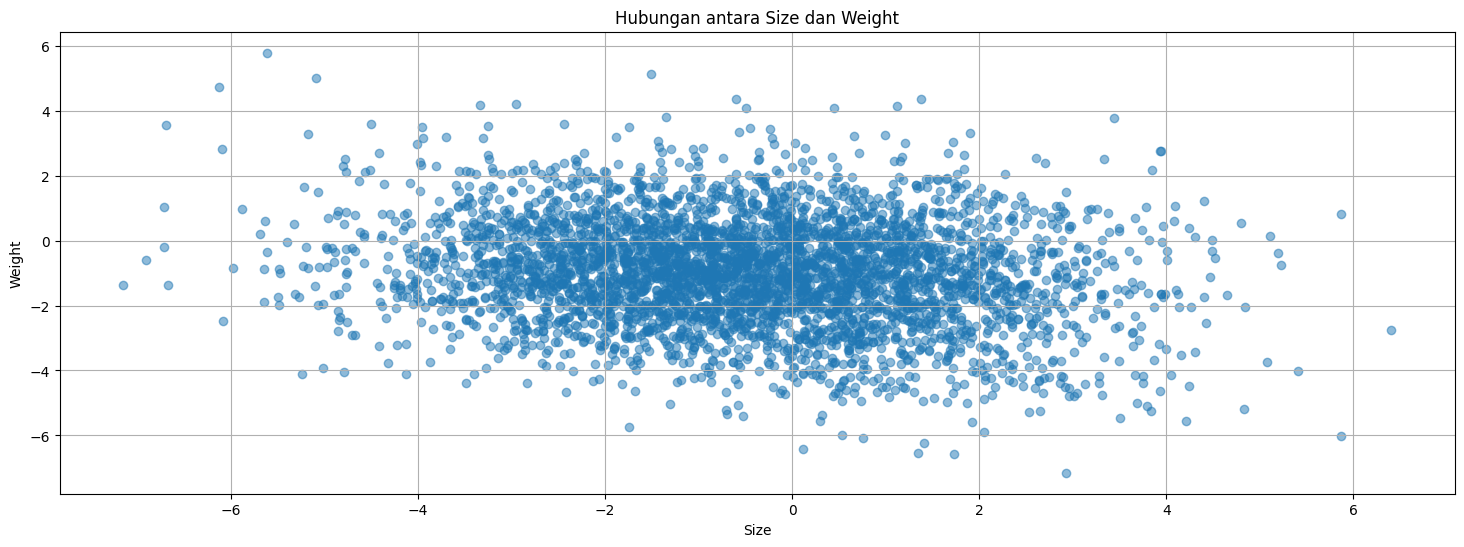

In [ ]:
# Menghitung korelasi antara size dan weight
correlation = apple_df['Size'].corr(apple_df['Weight'])
print('Korelasi antara Size dan Weight: ', correlation)

# Memvisualisasikan hubungan antara Size dan Weight
plt.figure(figsize=(18, 6))
plt.scatter(apple_df['Size'], apple_df['Weight'], alpha=0.5)
plt.title('Hubungan antara Size dan Weight')
plt.xlabel('Size')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

### Apakah terdapat korelasi antara tingkat kemanisan (Sweetness) dan tingkat kekrenyahan (Crunchiness) buah apel terhadap kualitas buah secara keseluruhan?

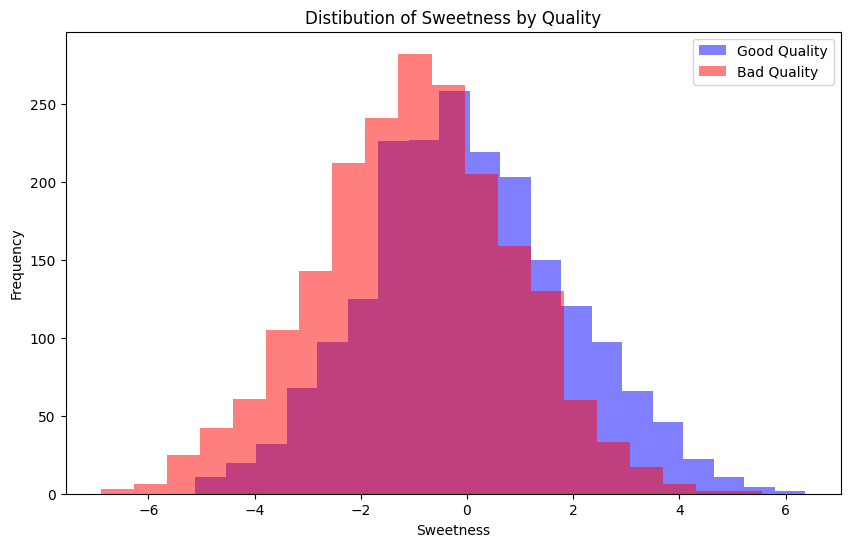

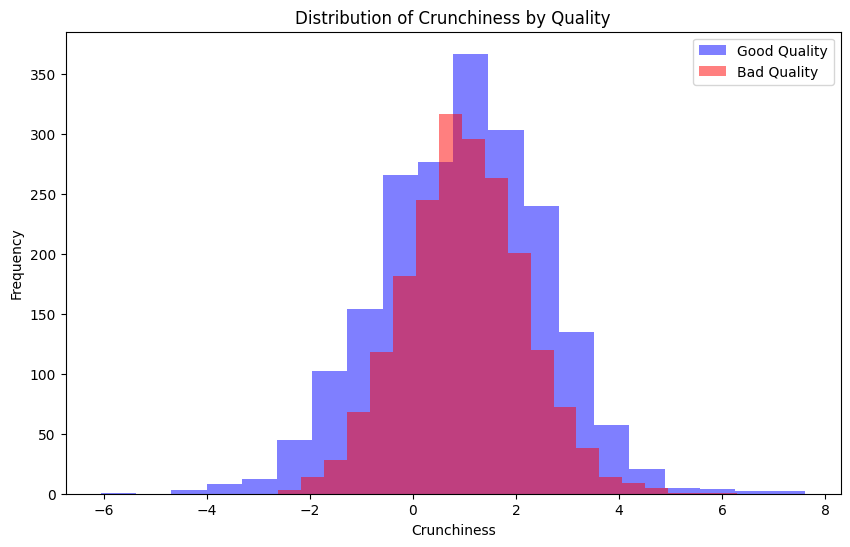

In [ ]:
# Analisis visual dengan membagi data berdasarkan kategori Quality dan kemudian melihat distribusi Sweetness dan Crunchiness dalam setiap kategori
bad_quality = apple_df[apple_df['Quality'] == 'bad']
good_quality = apple_df[apple_df['Quality'] == 'good']

# Visualisasi distribusi Sweetness dalam setiap grup Quality
plt.figure(figsize=(10, 6))
plt.hist(good_quality['Sweetness'], bins=20, alpha=0.5, color='blue', label='Good Quality')
plt.hist(bad_quality['Sweetness'], bins=20, alpha=0.5, color='red', label='Bad Quality')
plt.title('Distibution of Sweetness by Quality')
plt.xlabel('Sweetness')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualisasi distribusi Crunchiness dalam setiap grup Quality
plt.figure(figsize=(10, 6))
plt.hist(good_quality['Crunchiness'], bins=20, alpha=0.5, color='blue', label='Good Quality')
plt.hist(bad_quality['Crunchiness'], bins=20, alpha=0.5, color='red', label='Bad Quality')
plt.title('Distribution of Crunchiness by Quality')
plt.xlabel('Crunchiness')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Bagaimana distribusi tingkat kesegaran (Juiciness) buah apel terhadap tingkat kematangan (Ripeness) dan tingkat keasaman (Acidity)?

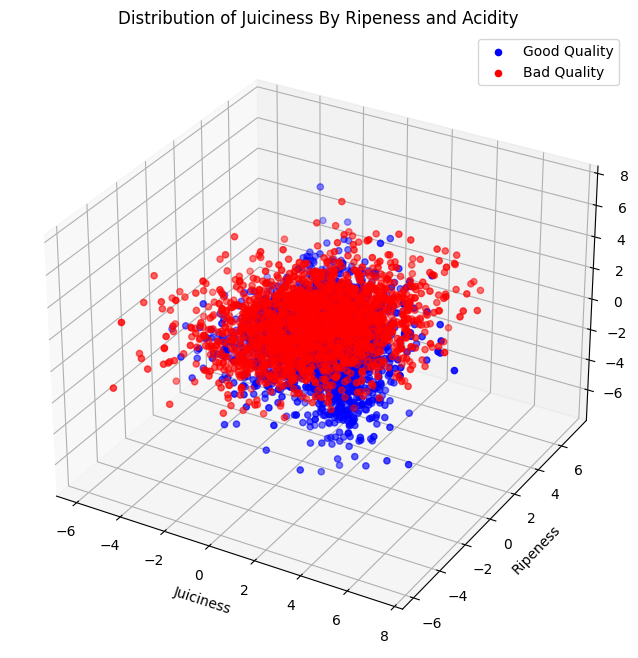

In [ ]:
#Membuat scatter plot 3d terlebih dahulu
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Memisahkan data berdasarkan kualitas
good_quality = apple_df[apple_df['Quality'] == 'good']
bad_quality = apple_df[apple_df['Quality'] == 'bad']

#Plotting titik-titik untuk buah apel berkualitas baik (Good Quality)
ax.scatter(good_quality['Juiciness'], good_quality['Ripeness'], good_quality['Acidity'], color='blue', marker='o', label='Good Quality')

#Plotting titik-titik untuk buah apel berkualitas buruk (Bad Quality)
ax.scatter(bad_quality['Juiciness'], bad_quality['Ripeness'], bad_quality['Acidity'], color='red', marker='o', label='Bad Quality')

# Memberi label pada setiap sumbu
ax.set_xlabel('Juiciness')
ax.set_ylabel('Ripeness')
ax.set_zlabel('Acidity')
ax.legend()
plt.title('Distribution of Juiciness By Ripeness and Acidity')
plt.show()

### Apakah ada pola yang dapat dilihat dalam atribut-atribut yang menyebabkan buah apel dikategorikan sebagai "good" atau "bad" dalam hal kualitasnya secara keseluruhan?

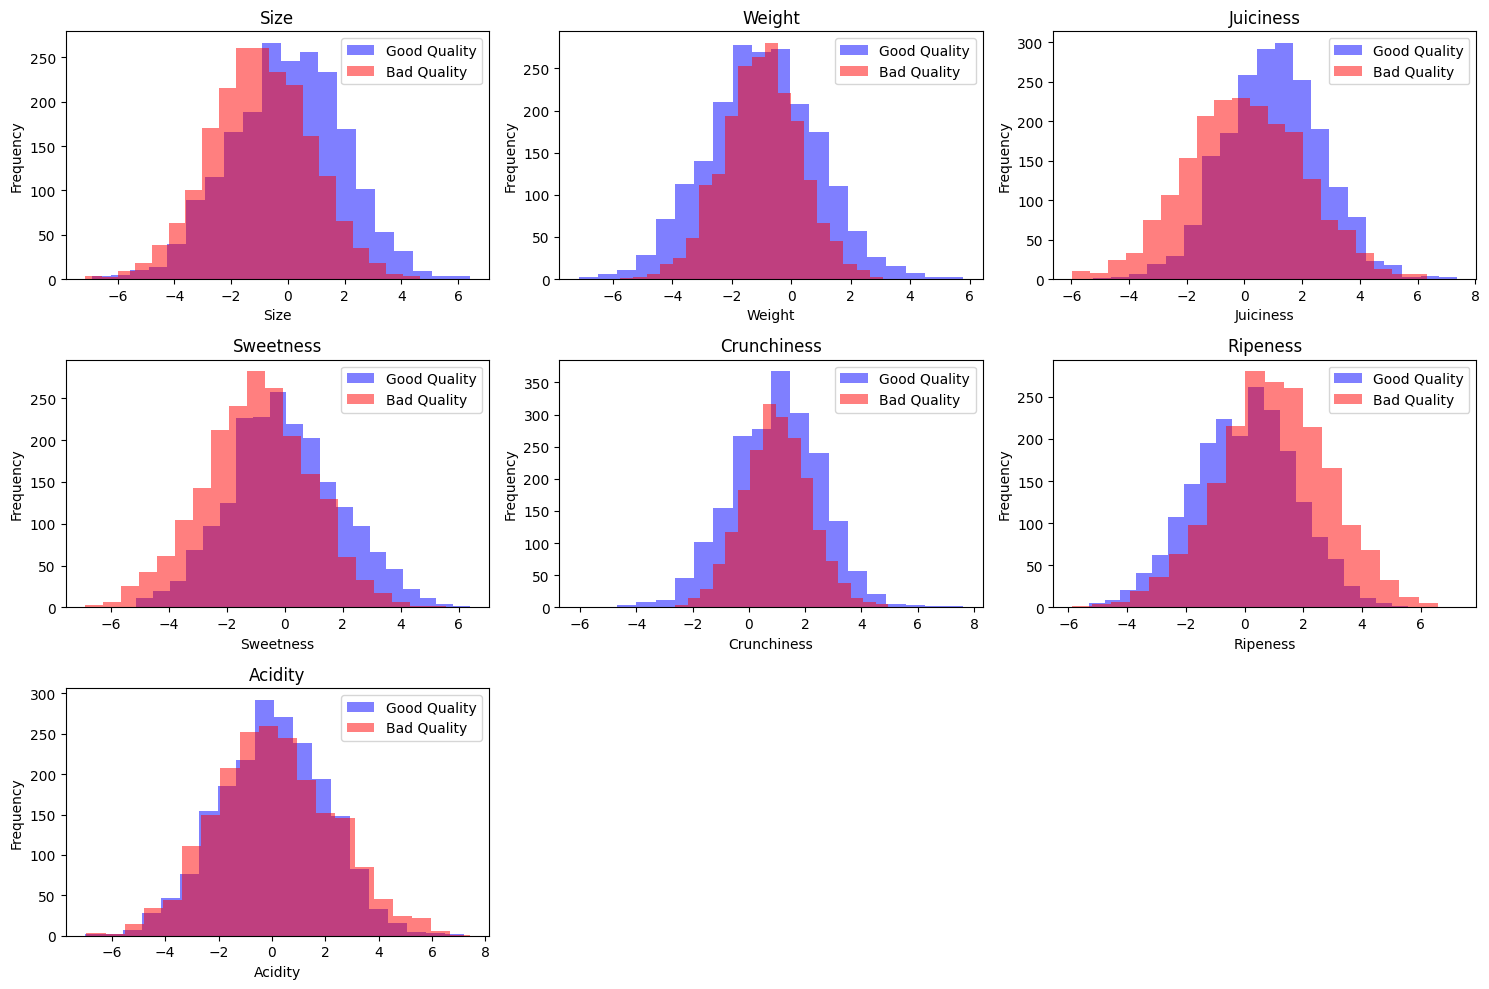

In [ ]:
# Memisahkan data berdasarkan kualitas
good_quality = apple_df[apple_df['Quality'] == 'good']
bad_quality = apple_df[apple_df['Quality'] == 'bad']

#Atribut-atribut yang ingin di bandingkan
attributes = ['Size', 'Weight', 'Juiciness', 'Sweetness', 'Crunchiness', 'Ripeness', 'Acidity']

# Visualisasi distribusi atribut-atribut antara kategori Quality
plt.figure(figsize=(15, 10))
for i, attribute in enumerate(attributes, 1):
  plt.subplot(3, 3, i)
  plt.hist(good_quality[attribute], bins=20, alpha=0.5, color='blue', label='Good Quality')
  plt.hist(bad_quality[attribute], bins=20, alpha=0.5, color='red', label='Bad Quality')
  plt.title(attribute)
  plt.xlabel(attribute)
  plt.ylabel('Frequency')
  plt.legend()

plt.tight_layout()
plt.show()